## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [2]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], regularizers = l1, ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=regularizers(ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=regularizers(ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
regularizers = [l1 , l1_l2 , l2]
ratio = [1e-4, 1e-8]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regularizer in regularizers:
    for regulizer_ratio in ratio:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Using regularizer: ", regularizer, ", Experiment with Regulizer = %.6f" % (regulizer_ratio))
        model = build_mlp(input_shape=x_train.shape[1:], regularizers = regularizer, ratio=regulizer_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Using regularizer:  <function l1 at 0x000001795FB10378> , Experiment with Regulizer = 0.000100
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______________________________

50000/50000 [==============================] - 11s 220us/step - loss: 2.7596 - acc: 0.6181 - val_loss: 3.0445 - val_acc: 0.5165
Epoch 48/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.7157 - acc: 0.6205 - val_loss: 3.0661 - val_acc: 0.5063
Epoch 49/50
50000/50000 [==============================] - 11s 230us/step - loss: 2.6834 - acc: 0.6214 - val_loss: 3.0189 - val_acc: 0.5043
Epoch 50/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.6476 - acc: 0.6241 - val_loss: 3.0285 - val_acc: 0.4939
Using regularizer:  <function l1 at 0x000001795FB10378> , Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

50000/50000 [==============================] - 12s 248us/step - loss: 0.9080 - acc: 0.6821 - val_loss: 1.5619 - val_acc: 0.4969
Epoch 48/50
50000/50000 [==============================] - 11s 221us/step - loss: 0.8910 - acc: 0.6880 - val_loss: 1.3916 - val_acc: 0.5306
Epoch 49/50
50000/50000 [==============================] - 12s 242us/step - loss: 0.8766 - acc: 0.6923 - val_loss: 1.4358 - val_acc: 0.5186
Epoch 50/50
50000/50000 [==============================] - 13s 251us/step - loss: 0.8679 - acc: 0.6944 - val_loss: 1.4347 - val_acc: 0.5196
Using regularizer:  <function l1_l2 at 0x000001795FB26048> , Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________

50000/50000 [==============================] - 14s 272us/step - loss: 1.7566 - acc: 0.4838 - val_loss: 1.7854 - val_acc: 0.4743
Epoch 48/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.7537 - acc: 0.4810 - val_loss: 1.7747 - val_acc: 0.4714
Epoch 49/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.7536 - acc: 0.4813 - val_loss: 1.7951 - val_acc: 0.4665
Epoch 50/50
50000/50000 [==============================] - 13s 269us/step - loss: 1.7484 - acc: 0.4830 - val_loss: 1.7643 - val_acc: 0.4747
Using regularizer:  <function l1_l2 at 0x000001795FB26048> , Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________

50000/50000 [==============================] - 14s 277us/step - loss: 1.6253 - acc: 0.5180 - val_loss: 1.6838 - val_acc: 0.4914
Epoch 48/50
50000/50000 [==============================] - 14s 274us/step - loss: 1.6214 - acc: 0.5186 - val_loss: 1.6741 - val_acc: 0.4953
Epoch 49/50
50000/50000 [==============================] - 14s 285us/step - loss: 1.6173 - acc: 0.5200 - val_loss: 1.7231 - val_acc: 0.4796
Epoch 50/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.6149 - acc: 0.5212 - val_loss: 1.7081 - val_acc: 0.4823
Using regularizer:  <function l2 at 0x000001795FB10F28> , Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

50000/50000 [==============================] - 12s 231us/step - loss: 1.0698 - acc: 0.6756 - val_loss: 1.5818 - val_acc: 0.5140
Epoch 48/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.0589 - acc: 0.6783 - val_loss: 1.5596 - val_acc: 0.5188
Epoch 49/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.0475 - acc: 0.6834 - val_loss: 1.6344 - val_acc: 0.5159
Epoch 50/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.0359 - acc: 0.6863 - val_loss: 1.6426 - val_acc: 0.4994
Using regularizer:  <function l2 at 0x000001795FB10F28> , Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

50000/50000 [==============================] - 10s 210us/step - loss: 0.9078 - acc: 0.6811 - val_loss: 1.3668 - val_acc: 0.5391
Epoch 48/50
50000/50000 [==============================] - 10s 210us/step - loss: 0.8962 - acc: 0.6849 - val_loss: 1.4285 - val_acc: 0.5184
Epoch 49/50
50000/50000 [==============================] - 11s 214us/step - loss: 0.8891 - acc: 0.6869 - val_loss: 1.3889 - val_acc: 0.5305
Epoch 50/50
50000/50000 [==============================] - 11s 212us/step - loss: 0.8752 - acc: 0.6924 - val_loss: 1.4160 - val_acc: 0.5268


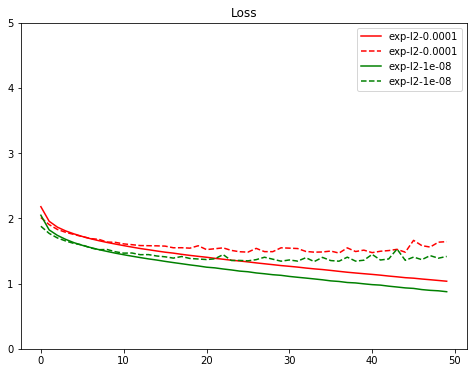

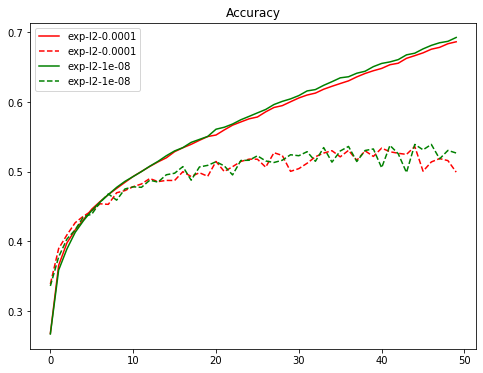

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()